<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Laboratorio: Construcción Modelo de Clasificación y Evaluación de Métricas

Tras realizar el preprocesamiento de los datos y dejarlos listos para construir modelos, ha llegado el momento de dar el siguiente paso: desarrollar tu **primer modelo de clasificación**.

El objetivo de este laboratorio es implementar un modelo de clasificación inicial utilizando **Regresión Logística (Logistic Regression)**. Este modelo te permitirá obtener las primeras predicciones para identificar transacciones normales y anómalas, así como evaluar su desempeño utilizando métricas estándar.

Además, deberás evaluar si el modelo está en riesgo de **overfitting**, asegurando que nuestras predicciones sean consistentes tanto en los datos de entrenamiento como en los de prueba.


## Objetivo del Laboratorio

1. Entrenar un modelo de **Regresión Logística** para predecir si una transacción es "Normal" o "Anómala".

2. Evaluar el desempeño del modelo utilizando métricas como:

   - Precisión (Accuracy).

   - Matriz de confusión.

   - Precisión (Precision), exhaustividad (Recall) y F1-Score.

   - Área bajo la curva ROC (AUC-ROC).

3. Determinar si el modelo presenta **overfitting** o **underfitting**, analizando el rendimiento en los datos de entrenamiento y prueba.


In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import pickle

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score


In [2]:
import sys
import os
sys.path.append(os.path.abspath('../'))

In [3]:
# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------

from src import soporte_ajuste_logistica as sal

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_pickle('datos/datos_preprocesados.pkl')

In [6]:
df.head()

,is_fraudulent,customer_id,merchant_id,amount,purchase_category,customer_age,card_type_American Express,card_type_Discover,card_type_MasterCard,card_type_Visa,...,outliers_ifo_0.01_75,outliers_ifo_0.01_100,outliers_ifo_0.05_25,outliers_ifo_0.05_50,outliers_ifo_0.05_75,outliers_ifo_0.05_100,outliers_ifo_0.1_25,outliers_ifo_0.1_50,outliers_ifo_0.1_75,outliers_ifo_0.1_100
0,0,0.779808,0.510079,0.575423,0.900628,0.480769,0.0,0.0,1.0,0.0,...,1,1,1,1,1,1,1,1,1,1
1,1,0.791454,0.584829,0.189301,0.143774,0.826923,0.0,0.0,0.0,1.0,...,1,1,1,1,1,1,1,1,1,1
2,1,0.948651,0.463460,0.123960,0.900628,0.750000,0.0,0.0,1.0,0.0,...,1,1,1,1,1,1,1,1,1,1
3,1,0.791454,0.541243,0.761671,0.512530,0.788462,0.0,1.0,0.0,0.0,...,1,1,1,1,1,1,1,1,1,1
4,1,0.518519,0.533525,0.188153,0.678115,0.346154,0.0,0.0,1.0,0.0,...,1,1,1,1,1,1,1,1,1,1


In [7]:
df = df.astype(float)

In [8]:
# instanciamos la clase de regresión logistica
logistica = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "is_fraudulent")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = logistica.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_resultados

,train,test
accuracy,0.565327,0.532592
precision,0.565224,0.532623
recall,0.565327,0.532592
f1,0.565162,0.532356
kappa,0.130205,0.065121
auc,0.593967,0.556830


Un accuracy del 57 % en el test quiere decir que el modelo apenas predice algo mejor que la aleatoridad o azar (que sería el 50%).

La precision es del 57  % y dado que en el EDA no apreciamos desbalanceo, podemos concluir que predice igual de bien (o de mal) los positivos que los negativos.

El recall indica que un 57% de los positivos fueron correctamente identificados por el modelo.

El f1 también se mueve en torno al 57% cosa, totalmente lógica dado que esta métrica es la media armónica de accuracy y precision.

La kappa de menos de 0.15 en el test indica que tenemos una concordancia muy leve teniendo en cuenta que el 0 es el azar y el 1 indica concordancia perfecta entre las predicciones y el valor verdadedo, pues la conclusión es que apenas mejoramos el modelo aleatorio




El AUC, area bajo la curva ROC, de 0.6 nos habla de un modelo que mejora en poco al azar (0,5) en su capacidad para clasificar. El AUC repr

Como tónica general se observa que en el test obtenemos datos ligeramente mejores que en el train y que los indicadores de las metricas son bajos, pues mejoramos en poco al azar. Por tanto, este modelo predictivo presenta underfittin

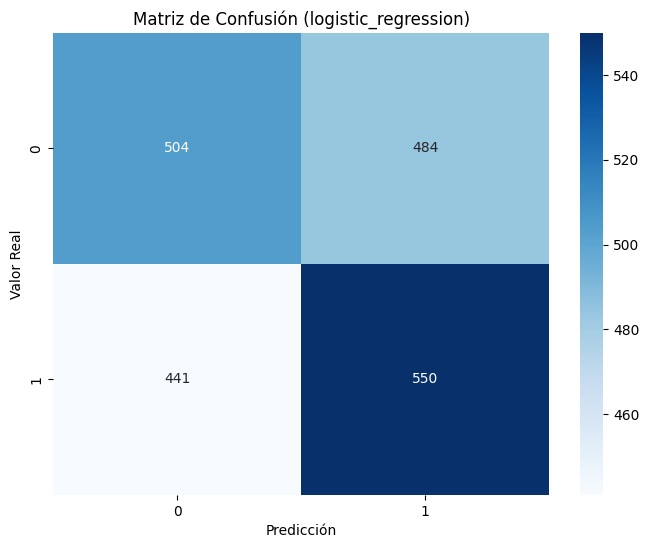

In [9]:
logistica.plot_matriz_confusion("logistic_regression")


Tenemos 525 verdaderos negativos, 474 falsos positivos, 368 falsos negativos y 611 veradedos positivos. El modelo es mejorable, pero podemos felicitarnos de que la mayoría de predicciones caen en la categoría de verdaderos positivos y veraderos negativos. Así que el modelo predice correctamente más veces de las que se equivoca. Si no fuese así habríamos perdido el tiempo pues habría sido mejor clasificar en base a lanzamientos de una moneda por ejemplo.

A continuación sacamos la curva ROC

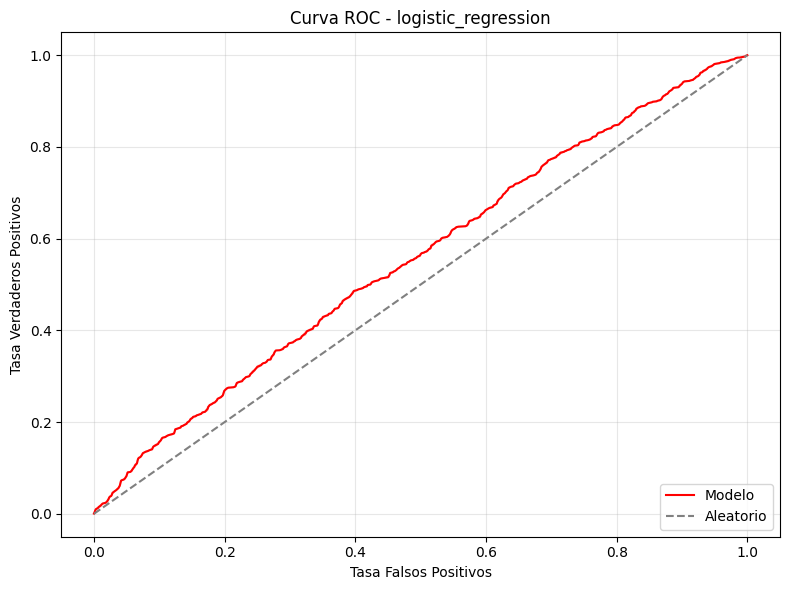

In [10]:
logistica.plot_curva_roc("logistic_regression")